In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai import *
from fastai.vision import *
from fastai.callbacks import *
from fastai.layers import LabelSmoothingCrossEntropy

In [4]:
folder = Path('D:/ProgProjekte/Python/Results-Exact-Study/Patches')

In [5]:
path = folder/"Annotation/All"

In [6]:
tfms = get_transforms(do_flip=True, 
                      flip_vert=True, 
                      max_rotate=90,  
                      #max_lighting=0.0, 
                      #max_zoom=2, 
                      #max_warp=0.2,
                      #p_affine=0.75,
                      #p_lighting=0.75,  
                      #xtra_tfms=xtra_tfms,
                     )

In [7]:
def get_data(bs,size):
    data = ImageDataBunch.from_folder(path, train="train", valid="val", size=size, bs=bs, ds_tfms=tfms, num_workers=0)
    return data.normalize()

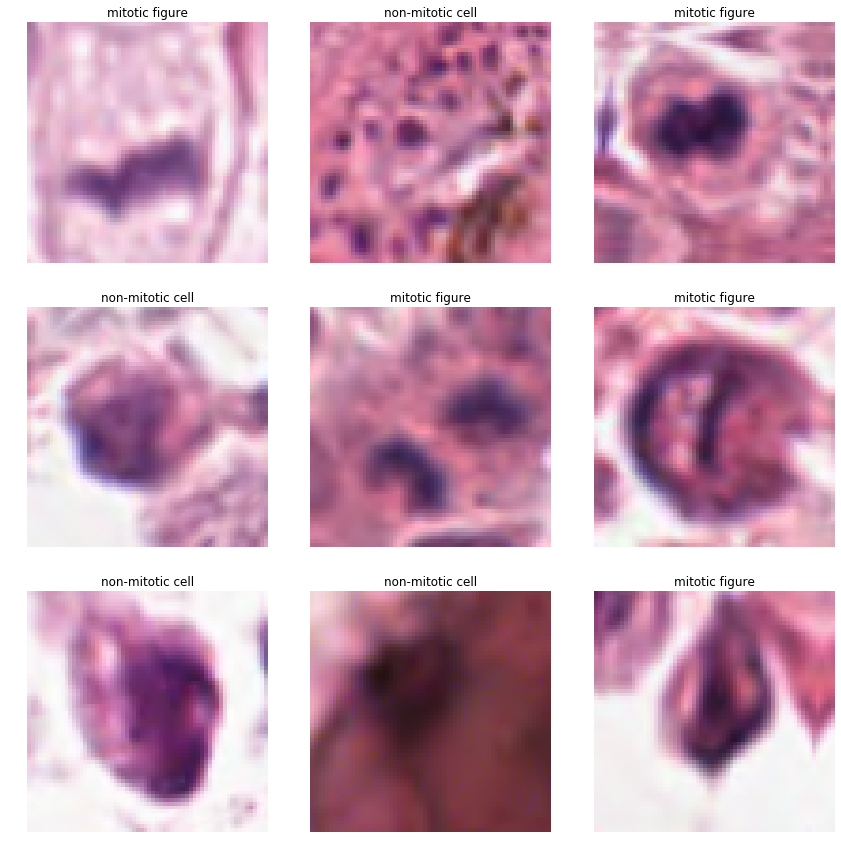

In [8]:
data = get_data(64,64)
fig = data.show_batch(3, return_fig=True)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


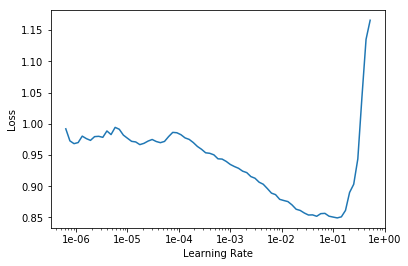

In [10]:
crit = LabelSmoothingCrossEntropy()
learn = cnn_learner(get_data(bs=64, size=64), models.resnet18, metrics=[error_rate, accuracy], callback_fns=[ShowGraph], loss_func=crit)
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.793022,0.866040,0.357705,0.642295,00:17
1,0.717135,0.584368,0.245219,0.754781,00:18
2,0.636204,0.522348,0.215973,0.784027,00:18
3,0.558281,0.497396,0.192351,0.807649,00:18
4,0.505163,0.487539,0.191226,0.808774,00:19


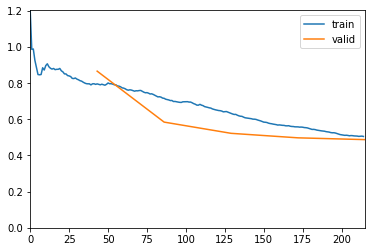

In [11]:
lr = 0.05
learn.fit_one_cycle(5, slice(lr))

In [12]:
learn.unfreeze()

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.468462,0.483132,0.187852,0.812148,00:20
1,0.458955,0.479804,0.183352,0.816648,00:21
2,0.454208,0.454186,0.159730,0.840270,00:20
3,0.438139,0.452982,0.158043,0.841957,00:20
4,0.429262,0.437948,0.151294,0.848706,00:20
5,0.418321,0.435305,0.146794,0.853206,00:20
6,0.413293,0.433858,0.146794,0.853206,00:19
7,0.407842,0.417516,0.136108,0.863892,00:19
8,0.410278,0.427388,0.138920,0.861080,00:20
9,0.411578,0.430354,0.142295,0.857705,00:19


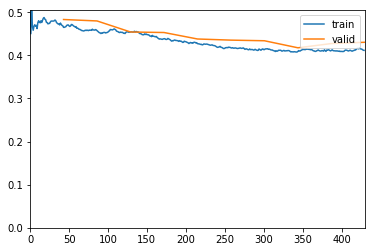

In [13]:
lr = 0.001
learn.fit_one_cycle(10, slice(1e-5, lr/5))